In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime
from statsmodels import api as sm

from sklearn.feature_selection import mutual_info_classif

In [16]:
# load the data into a single dataframe

import glob

path = r'./24h' # use your path
all_files = glob.glob(path + "/*.csv")

df = pd.concat((pd.read_csv(f) for f in all_files))


In [17]:
df.head()

,timestamp,exchange,market,base,quote,from,to,open,close,high,low,volume_base,volume_quote,date,period_ns
0,1438992000000000000,cccagg,eth-usd,eth,usd,1438905600000000000,1438992000000000000,0.7812,2.7730,27.7900,0.7809,53584.56,148608.32,2015-08-08,86400000000000
1,1439078400000000000,cccagg,eth-usd,eth,usd,1438992000000000000,1439078400000000000,2.7730,0.8076,2.5810,0.5958,722558.00,583543.48,2015-08-09,86400000000000
2,1439164800000000000,cccagg,eth-usd,eth,usd,1439078400000000000,1439164800000000000,0.8076,0.7428,0.9581,0.6043,737119.57,547528.03,2015-08-10,86400000000000
3,1439251200000000000,cccagg,eth-usd,eth,usd,1439164800000000000,1439251200000000000,0.7428,0.6846,0.7628,0.5990,585917.04,401107.09,2015-08-11,86400000000000
4,1439337600000000000,cccagg,eth-usd,eth,usd,1439251200000000000,1439337600000000000,0.6846,1.0590,1.1650,0.6548,1479695.62,1567648.93,2015-08-12,86400000000000


In [18]:
twoh = pd.read_csv('./24h/candles_bch-usd_24h.csv')

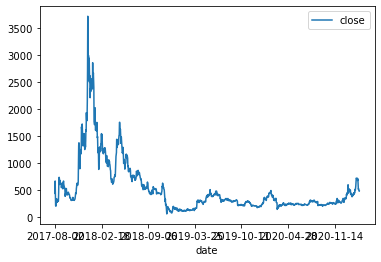

In [26]:
twoh.plot(x ='date', y='close')
plt.show()

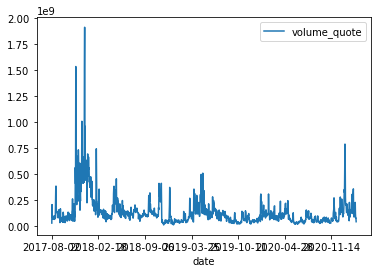

In [27]:
twoh.plot(x ='date', y='volume_quote')
plt.show()

In [52]:
path = r'./24h' # use your path
all_files = glob.glob(path + "/*.csv")

df_returns

df_returns_1 = pd.concat((pd.read_csv(f)['close'].pct_change() for f in all_files))

df_returns_2 = pd.concat((pd.read_csv(f)['base'] for f in all_files))

date = twoh['date']

final = pd.DataFrame()
final['close'] = df_returns_1
final['stock'] = df_returns_2
final['date'] = date
final

,close,stock,date
0,NaN,eth,2017-08-02
1,-0.708763,eth,2017-08-03
2,-0.080238,eth,2017-08-04
3,-0.078352,eth,2017-08-05
4,0.546889,eth,2017-08-06
...,...,...,...
3874,-0.096496,btc,NaN
3875,0.017168,btc,NaN
3876,-0.053386,btc,NaN
3877,-0.016107,btc,NaN


In [31]:
#calculate correlation
df_close = df['close'].pct_change()
df_close

0            NaN
1      -0.708763
2      -0.080238
3      -0.078352
4       0.546889
          ...   
3874   -0.096496
3875    0.017168
3876   -0.053386
3877   -0.016107
3878   -0.002873
Name: close, Length: 18317, dtype: float64

In [ ]:
########################

In [140]:
path = r'./24h' # use your path
all_files = glob.glob(path + "/*.csv")

stocks_close = []
names = []


for f in all_files:
    stocks_close.append(pd.read_csv(f)['close'])
    names.append(pd.read_csv(f)['base'].iloc[0])

    



In [141]:
final = pd.DataFrame()

In [142]:
for i in range(len(stocks_pct)):
    final[names[i]] = stocks_pct[i]


In [143]:
final['date'] = twoh['date']

In [144]:
final

,eth,ada,link,ltc,xlm,bnb,bch,xmr,btc,date
0,2.7730,0.02519,0.1727,2.590,0.002136,1.586,441.72,0.3149,0.04951,2017-08-02
1,0.8076,0.02588,0.1578,2.554,0.002085,1.430,670.61,0.3217,0.08584,2017-08-03
2,0.7428,0.02084,0.1335,2.666,0.002074,2.260,405.76,0.2954,0.08080,2017-08-04
3,0.6846,0.02189,0.1696,2.337,0.002132,1.934,217.27,0.3159,0.07474,2017-08-05
4,1.0590,0.02152,0.1784,2.502,0.002122,0.000,203.50,0.3019,0.07921,2017-08-06
...,...,...,...,...,...,...,...,...,...,...
2027,1578.1900,NaN,NaN,82.200,0.039550,NaN,NaN,91.5400,368.02000,NaN
2028,1625.1700,NaN,NaN,82.610,0.040570,NaN,NaN,89.9200,390.65000,NaN
2029,1481.8800,NaN,NaN,81.700,0.040620,NaN,NaN,91.2300,386.46000,NaN
2030,1446.1000,NaN,NaN,77.300,0.043050,NaN,NaN,93.5800,376.68000,NaN


In [145]:
correlation = final.corr()
correlation

,eth,ada,link,ltc,xlm,bnb,bch,xmr,btc
eth,1.000000,-0.237104,0.220501,0.036188,-0.067719,0.072377,-0.355515,0.252533,0.128027
ada,-0.237104,1.000000,0.411357,0.506997,0.578601,0.055172,0.304112,0.075108,0.591456
link,0.220501,0.411357,1.000000,-0.193284,0.773036,0.637374,-0.276565,0.747252,0.850026
ltc,0.036188,0.506997,-0.193284,1.000000,0.240470,-0.085589,0.525812,0.046007,0.352684
xlm,-0.067719,0.578601,0.773036,0.240470,1.000000,0.430945,-0.101540,0.283323,0.872307
bnb,0.072377,0.055172,0.637374,-0.085589,0.430945,1.000000,-0.093193,0.231091,0.644263
bch,-0.355515,0.304112,-0.276565,0.525812,-0.101540,-0.093193,1.000000,-0.305736,-0.113951
xmr,0.252533,0.075108,0.747252,0.046007,0.283323,0.231091,-0.305736,1.000000,0.308763
btc,0.128027,0.591456,0.850026,0.352684,0.872307,0.644263,-0.113951,0.308763,1.000000


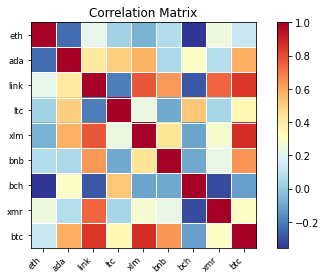

In [146]:
#plot correlation matrix
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

<Figure size 432x288 with 0 Axes>

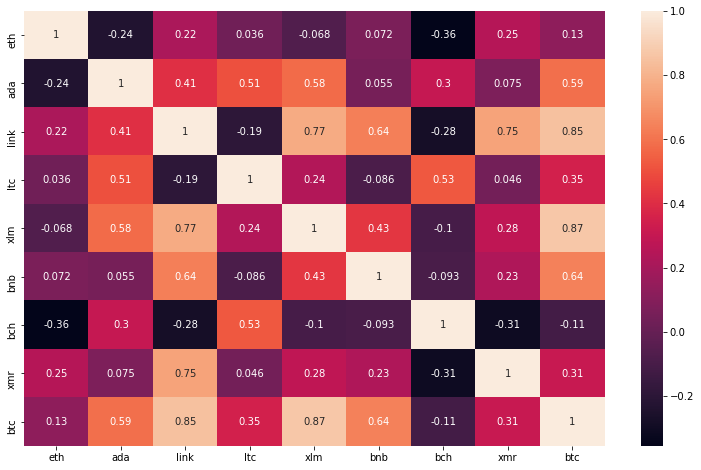

<Figure size 432x288 with 0 Axes>

In [147]:
plt.figure(figsize=(13, 8))
seaborn.heatmap(correlation, annot=True)
plt.figure()

In [149]:
###################################################################################################################

In [152]:
##################################### FIND MUTUAL INFORMATION #####################################################

In [154]:
price = twoh['close']
volume = twoh['volume_base']

In [167]:
from sklearn.metrics import mutual_info_score

print(mutual_info_score(price, volume))

7.161701016841852


/Users/angeloskafounis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [168]:
a = np.array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1])
b = np.array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1])


print(mutual_info_classif(a.reshape(-1,1), b, discrete_features = True)) # mutual information of 0.69, expressed in nats
print(mutual_info_score(a,b))

[0.69314718]
0.6931471805599456


/Users/angeloskafounis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


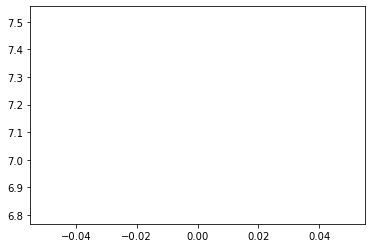

In [173]:

plt.plot(mutual_info_score(price, volume))
plt.show()